# SDS PROJECT: Who Survived The Titanic

## PART 1: Cleaning the dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import statistics
from math import *
from sklearn import preprocessing
from scipy import stats

In [4]:
df = pd.read_csv('titanic_train_uncleaned.csv')  #loading the dataset
df_copy = df.copy()  #creating a copy of the dataset

In [5]:
print("Number of rows:", len(df.axes[0]))   #number of rows in the dataset
print("Number of columns:", len(df.axes[1]))   #number of columns in the dataset

Number of rows: 891
Number of columns: 12


In [6]:
df.head(10)  #displaying the top 10 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.tail(10)  #displaying the bottom 10 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [8]:
df.describe() #this is for numerical data types

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include=['O'])  #this is for categorical data types

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sivic, Mr. Husein",male,1601,B96 B98,S
freq,1,577,7,4,644


In [10]:
print(df.isnull().sum())  #displays the count of the missing values in the each column of the dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<AxesSubplot:>

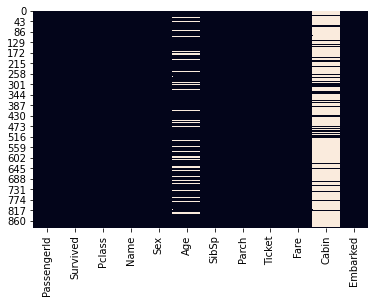

In [11]:
sns.heatmap(df.isnull(), cbar=False)   #visualizing the missing data using a heatmap

/Users/trishajain/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/trishajain/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/trishajain/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has change

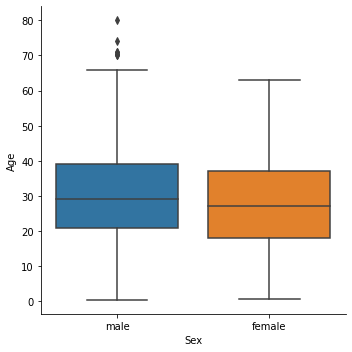

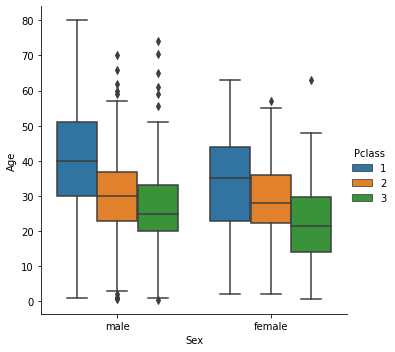

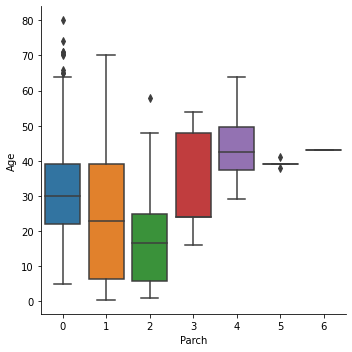

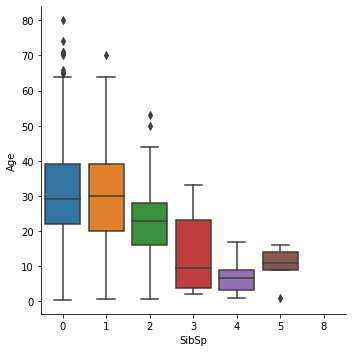

In [12]:
# Comparative Boxplots: Age vs Sex, Parch , Pclass and SibSP
boxplot = sns.factorplot(y="Age",x="Sex",data=df, kind="box")
boxplot = sns.factorplot(y="Age",x="Sex",hue="Pclass", data=df, kind="box")
boxplot = sns.factorplot(y="Age",x="Parch", data=df, kind="box")
boxplot = sns.factorplot(y="Age",x="SibSp", data=df, kind="box")

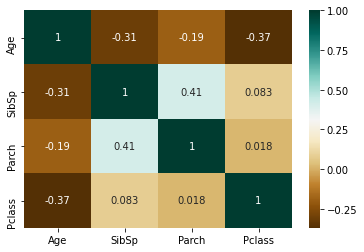

In [13]:
heatmap =  sns.heatmap(df[["Age","Sex","SibSp","Parch","Pclass"]].corr(),cmap="BrBG",annot=True)

In [14]:
# Age attribute imputed with the median age of similar rows according to Pclass, Parch and SibSp
index_NaN_age = list(df["Age"][df["Age"].isnull()].index)   # Index of the rows having age attribute as nan

for i in index_NaN_age :
    age_med = df["Age"].median()
    age_pred = df["Age"][((df['SibSp'] == df.iloc[i]["SibSp"]) & (df['Parch'] == df.iloc[i]["Parch"]) & (df['Pclass'] == df.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        df['Age'].iloc[i] = age_pred
    else :
        df['Age'].iloc[i] = age_med

/Users/trishajain/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
df.isnull().sum()  #checking whether the missing values for the age attribute have been imputed

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

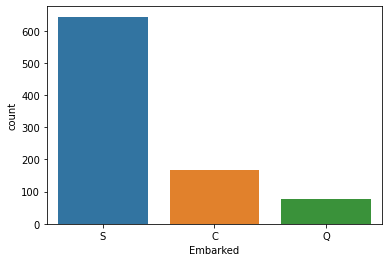

In [16]:
sns.countplot(x = 'Embarked', data = df)  #plotting a countplot of Embarked alltribute of the dataframe

In [17]:
df["Embarked"] = df["Embarked"].fillna("S") #the attribute embarked is imputed with the mode 'S'

In [18]:
df.drop(['Cabin'], axis = 1, inplace = True)  #the attribute cabin is dropped since there are too many missing values

In [19]:
df.isnull().sum()  #checking whether there are any missing vlaues left in the dataset

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
pd.Series(df['PassengerId']).is_unique  #used to check if there are any duplicate observations in the dataset

True

In [21]:
coding_categorical = {'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':'2'}} #encoding categorical features
df.replace(coding_categorical, inplace = True)

In [22]:
df.head()   #displaying the encoded categorical features

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


## PART 2: Exploratory Data Analysis

In [24]:
df_2 = pd.read_csv ('cleaned_titanic.csv')

In [25]:
df_2.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


<AxesSubplot:xlabel='Survived', ylabel='count'>

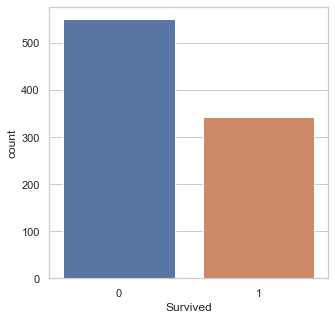

In [26]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_2)
##### shows the survivors and non-survivors (0 -> non-survivors, 1 -> survivors).

<AxesSubplot:xlabel='Sex', ylabel='count'>

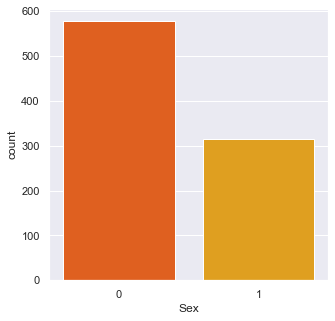

In [27]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x = 'Sex', data=df_2, palette='autumn')
# shows the number of male and female survivors

<AxesSubplot:xlabel='Survived', ylabel='count'>

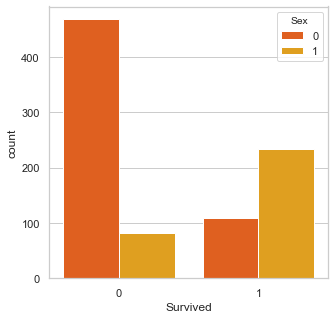

In [28]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue='Sex', data=df_2, palette='autumn')
##### shows the survivors and non survivors depending on the Sex  (0 -> MALE, 1 -> FEMALE).

<AxesSubplot:xlabel='Pclass', ylabel='count'>

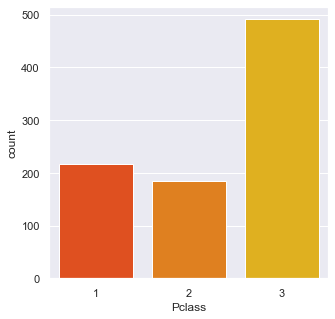

In [29]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x = 'Pclass', data=df_2, palette='autumn')
# shows the number of passengers in all the Pclasses

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

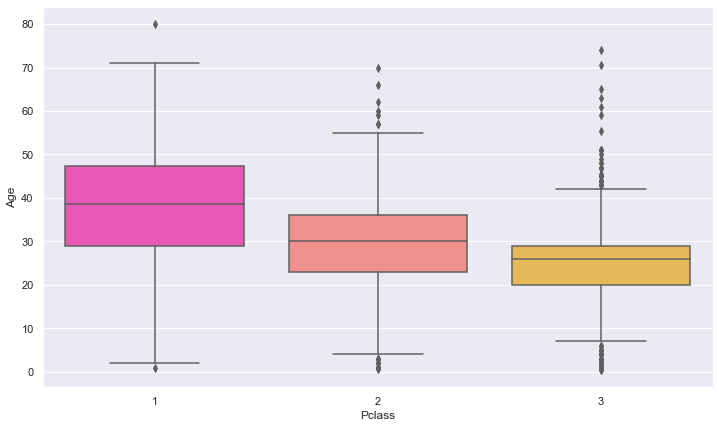

In [30]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_2,palette='spring')
##### the average age of the passengers, within each Pclass.

<AxesSubplot:>

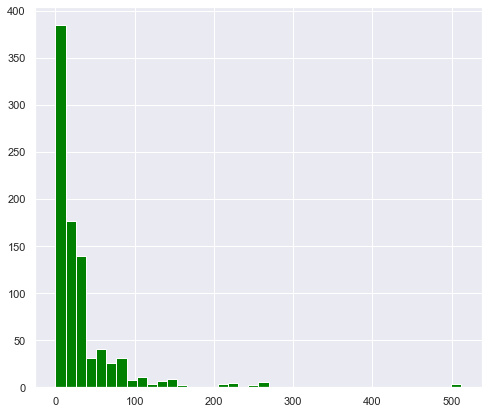

In [31]:
df_2['Fare'].hist(color='green',bins=40,figsize=(8,7))  #Histogram showing the distribution of Fare in the dataset

<AxesSubplot:>

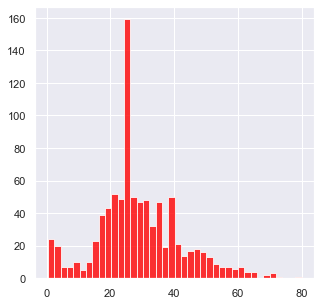

In [32]:
df_2['Age'].hist(bins = 40, color = 'red', alpha = 0.8)   #Histogram showing the age distribution in the dataset

<AxesSubplot:xlabel='SibSp', ylabel='count'>

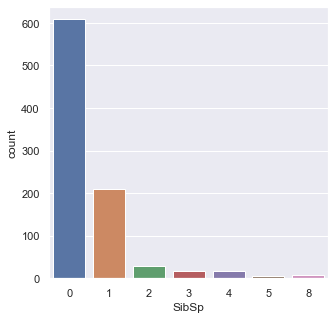

In [33]:
sns.countplot(x='SibSp',data=df_2)   #shows the number pf passengers with different SibSp counts

<AxesSubplot:xlabel='Survived', ylabel='count'>

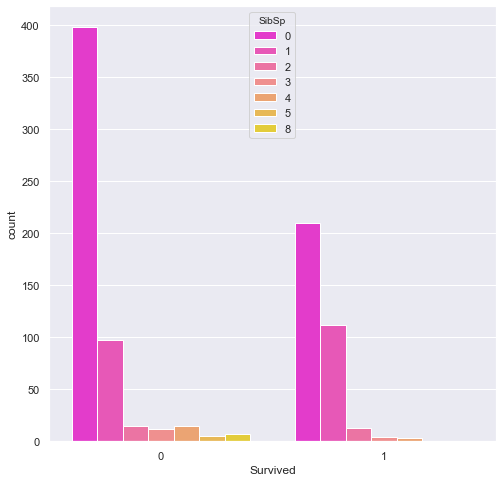

In [34]:
sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(x = 'Survived', hue='SibSp', data=df_2, palette='spring')
##### Comparison between the mortality rates for passengers with different SipSp, (0 -> DIED, 1 -> SURVIVED).

<AxesSubplot:xlabel='Survived', ylabel='count'>

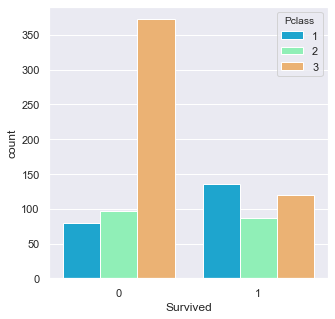

In [35]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x='Survived', hue='Pclass', data=df_2, palette='rainbow')
##### Comparison between the Survivors amongst various Pclasses.

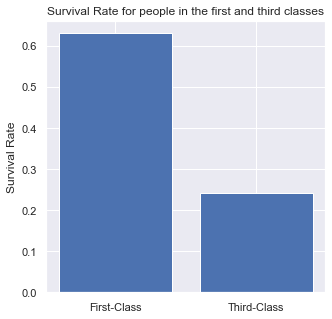

In [36]:
x = ["First-Class", "Third-Class"]
y = [np.mean(df_2["Survived"][df_2["Pclass"]==1]), np.mean(df_2["Survived"][df_2["Pclass"]==3])]
plt.bar(x, y)
plt.ylabel("Survival Rate")
plt.title("Survival Rate for people in the first and third classes")
plt.show()
### Comparing the survival of the first and the third class

<AxesSubplot:xlabel='Parch', ylabel='count'>

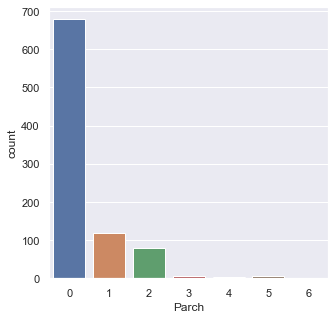

In [37]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x='Parch',data=df_2)
##### Number of people travelling amongst the different Parch classes before the incident.

<AxesSubplot:xlabel='Survived', ylabel='count'>

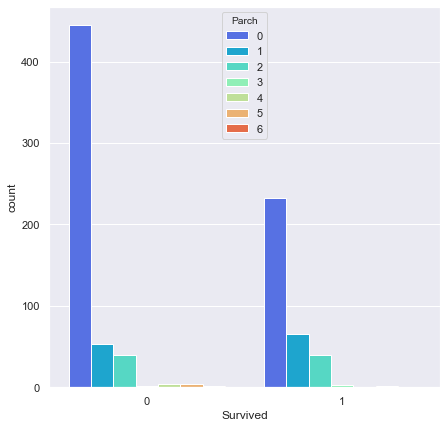

In [38]:
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(x='Survived', hue='Parch', data=df_2, palette='rainbow')
##### A plot between the survivors and non-survivors amongst the differetn Parch classes.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

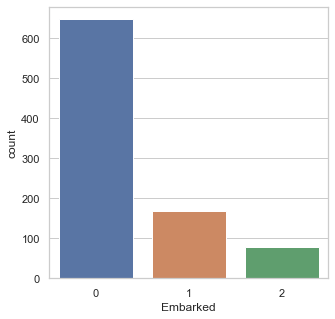

In [39]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style('whitegrid')
sns.countplot(x='Embarked',data=df_2)
#Number of people who embarked from different ports

<AxesSubplot:xlabel='Survived', ylabel='count'>

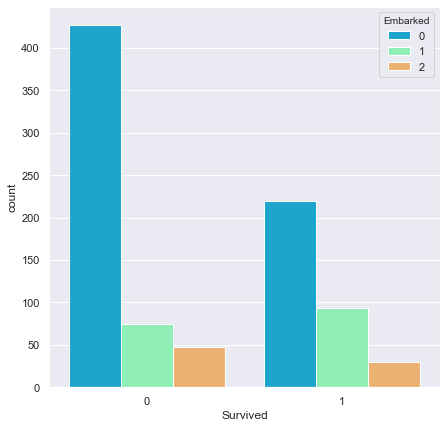

In [40]:
sns.set(rc={'figure.figsize':(7,7)})
sns.countplot(x='Survived', hue='Embarked', data=df_2, palette='rainbow')
##### A plot between the survivors and non-survivors amongst the different ports from which passengers embarked.

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

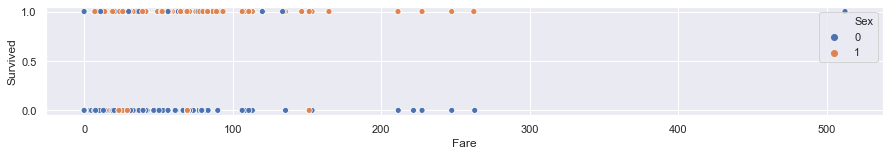

In [41]:
sns.set(rc={'figure.figsize':(15,2)})
sns.scatterplot(x='Fare', y='Survived', hue='Sex', data=df_2)  
#scatterplot used to disply the relationship between the three attributes Fare, Survived and Sex

### To show the outliers in the dataset

<AxesSubplot:xlabel='Fare'>

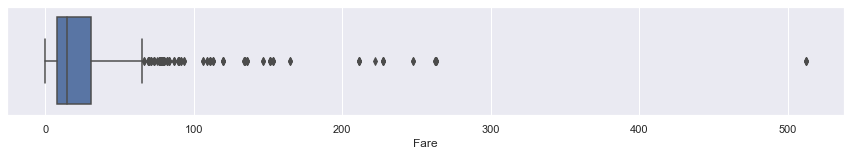

In [42]:
sns.set(rc={'figure.figsize':(15,2)})
sns.boxplot(x=df_2['Fare'])   #Outliers are present in Fare

<AxesSubplot:xlabel='Age'>

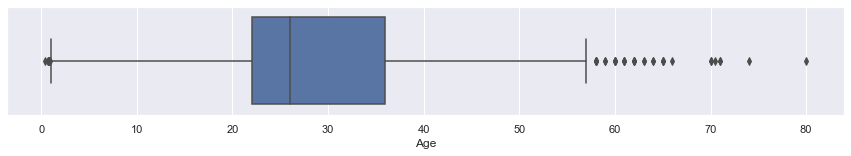

In [43]:
sns.set(rc={'figure.figsize':(15,2)})
sns.boxplot(x=df_2['Age'])  #Outliers are present in Age

<AxesSubplot:xlabel='Survived', ylabel='count'>

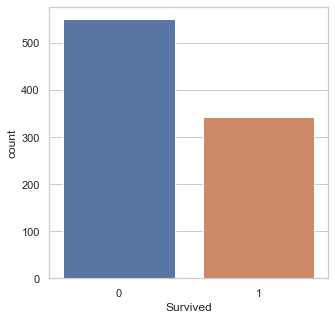

In [44]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_2)  
# No outliers are present in Survived

<AxesSubplot:xlabel='Pclass', ylabel='count'>

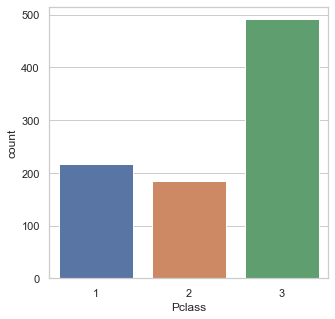

In [45]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style('whitegrid')
sns.countplot(x='Pclass',data=df_2)
# No outliers are present in Pclass

<AxesSubplot:xlabel='SibSp', ylabel='count'>

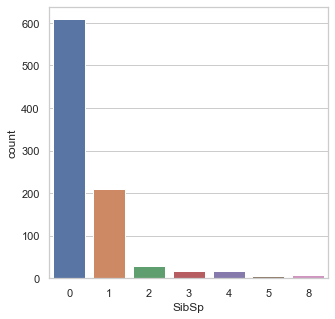

In [46]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style('whitegrid')
sns.countplot(x='SibSp',data=df_2)
# Outliers are present in SibSp

<AxesSubplot:xlabel='Parch', ylabel='count'>

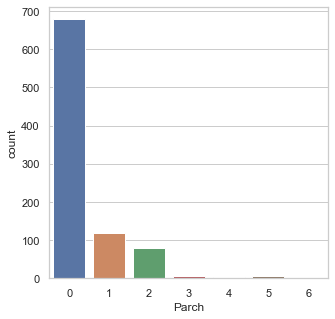

In [47]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style('whitegrid')
sns.countplot(x='Parch',data=df_2)
# Outliers are present in Parch

<AxesSubplot:xlabel='Sex', ylabel='count'>

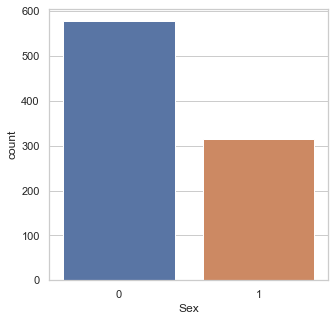

In [48]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=df_2)
# No Outliers are present in Sex

<AxesSubplot:xlabel='Embarked', ylabel='count'>

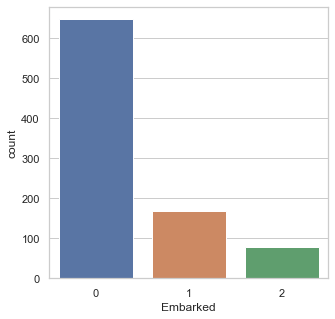

In [49]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style('whitegrid')
sns.countplot(x='Embarked',data=df_2)
# No Outliers are present in Embarked

### FIltering unwanted outliers

In [50]:
x_data=df_2[['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Sex', 'Age',
       'SibSp', 'Parch', 'Fare','Embarked']]
x_data.shape   #Selecting the non-text based columns from the dataset (excluding Name and Ticket)

(891, 10)

In [51]:
x_data2=x_data
w=x_data2.Age.mean()
x=x_data2.Fare.mean()
u=statistics.mode(x_data2.SibSp)
v=statistics.mode(x_data2.Parch)
print("Mean of age:",w)
print("Mean of Fare:",x)
print("Mode of SibSP:",u)
print("Mode of Parch",v)  
#Computing the mean and mode of the columns with categorical and numerical data types having outliers

Mean of age: 29.266184062850726
Mean of Fare: 32.2042079685746
Mode of SibSP: 0
Mode of Parch 0


In [52]:
# log-transformation of Fare since it is skewed
def log_transformation(data):
    return data.apply(np.log1p)
x_data2['Fare_log1p'] = log_transformation(x_data2['Fare'])

/Users/trishajain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<AxesSubplot:>

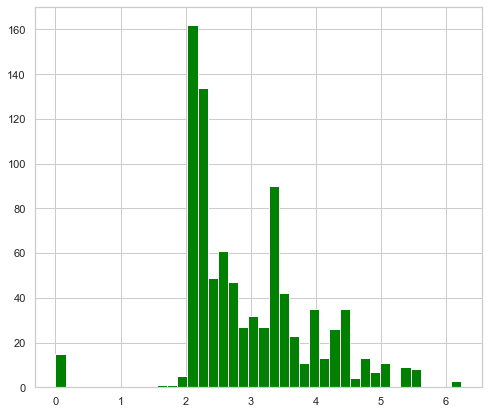

In [53]:
x_data2['Fare_log1p'].hist(color='green',bins=40,figsize=(8,7))  #Histogram showing the distribution of Fare_log1p 

In [54]:
def detect_outliers(df,n,features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col],25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 3 * IQR
        minimum=Q1-outlier_step
        maximum=Q3+outlier_step
        x_data2[col].iloc[x_data2[x_data2[col]<minimum].index]=np.nan
        x_data2[col].iloc[x_data2[x_data2[col]>maximum].index]=np.nan
    return x_data2
x_data2= detect_outliers(x_data2,2,["Age","SibSp","Fare_log1p"])
x_data2.Age=x_data2.Age.fillna(x_data2.Age.mean())
x_data2.SibSp=x_data2.SibSp.fillna(statistics.mode(x_data2.SibSp))
x_data2.Fare_log1p=x_data2.Fare_log1p.fillna(x_data2.Fare_log1p.mean())
x_data2.describe()

/Users/trishajain/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/trishajain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/trishajain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instan

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_log1p
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,0.352413,29.209180,0.432099,0.381594,32.204208,0.361392,2.962246
std,257.353842,257.353842,0.486592,0.836071,0.477990,13.212871,0.811879,0.806057,49.693429,0.635673,0.969048
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,2.187218
50%,445.000000,446.000000,0.000000,3.000000,0.000000,26.000000,0.000000,0.000000,14.454200,0.000000,2.737881
75%,667.500000,668.500000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,1.000000,3.465736
max,890.000000,891.000000,1.000000,3.000000,1.000000,74.000000,4.000000,6.000000,512.329200,2.000000,6.240917


<AxesSubplot:xlabel='Fare_log1p'>

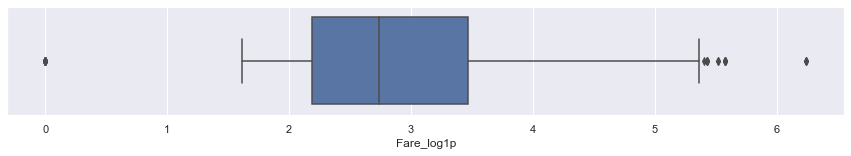

In [55]:
#Checking if the outliers have been removed by plotting graph for Fare_log1p
sns.set(rc={'figure.figsize':(15,2)})
sns.boxplot(x=x_data2['Fare_log1p'])   

<AxesSubplot:xlabel='Age'>

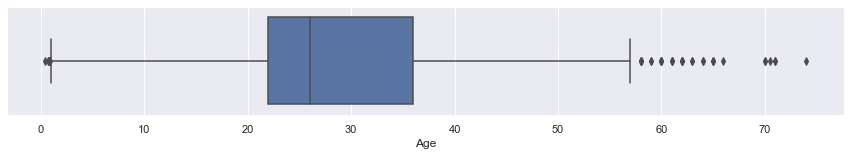

In [56]:
#Checking if the outliers have been removed by plotting graph for Age
sns.set(rc={'figure.figsize':(15,2)})
sns.boxplot(x=x_data2['Age'])  

<AxesSubplot:xlabel='SibSp', ylabel='count'>

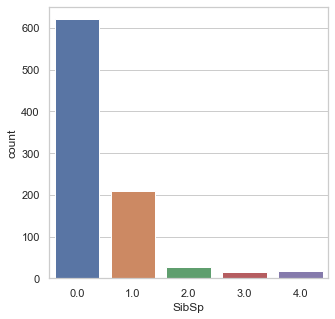

In [57]:
#Checking if the outliers have been removed by plotting graph for SibSp
sns.set(rc={'figure.figsize':(5,5)})
sns.set_style('whitegrid')
sns.countplot(x='SibSp',data=x_data2)

## PART 3: Normalization and Standardization

In [58]:
#Mean of all the columns of the dataset
print("Mean of Survived:",x_data2['Survived'].mean())
print("Mean of Pclass:",x_data2['Pclass'].mean())
print("Mean of Sex:",x_data2['Sex'].mean())
print("Mean of Age:",x_data2['Age'].mean())
print("Mean of SibSp:",x_data2['SibSp'].mean())
print("Mean of Parch:",x_data2['Parch'].mean())
print("Mean of Fare:",x_data2['Fare'].mean())
print("Mean of Embarked:",x_data2['Embarked'].mean())
print("Mean of Fare_log1p:",x_data2['Fare_log1p'].mean())

Mean of Survived: 0.3838383838383838
Mean of Pclass: 2.308641975308642
Mean of Sex: 0.35241301907968575
Mean of Age: 29.209179775280894
Mean of SibSp: 0.43209876543209874
Mean of Parch: 0.38159371492704824
Mean of Fare: 32.2042079685746
Mean of Embarked: 0.3613916947250281
Mean of Fare_log1p: 2.9622457416890775


In [59]:
#Variance of all the columns of the dataset
print("Variance of Survived:",x_data2['Survived'].var())
print("Variance of Pclass:",x_data2['Pclass'].var())
print("Variance of Sex:",x_data2['Sex'].var())
print("Variance of Age:",x_data2['Age'].var())
print("Variance of SibSp:",x_data2['SibSp'].var())
print("Variance of Parch:",x_data2['Parch'].var())
print("Variance of Fare:",x_data2['Fare'].var())
print("Variance of Embarked:",x_data2['Embarked'].var())
print("Variance of Fare_log1p:",x_data2['Fare_log1p'].var())

Variance of Survived: 0.2367722165474984
Variance of Pclass: 0.6990151199889065
Variance of Sex: 0.22847450787525722
Variance of Age: 174.57996797891695
Variance of SibSp: 0.65914828686365
Variance of Parch: 0.6497282437357467
Variance of Fare: 2469.436845743117
Variance of Embarked: 0.40408075763880574
Variance of Fare_log1p: 0.939054549827152


In [60]:
x_data3 = x_data2.copy()
df_columns = x_data3.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(x_data3)
scaled_df = pd.DataFrame(scaled_df, columns = df_columns)
scaled_df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_log1p
0,-1.730108,-1.730108,-0.789272,0.827377,-0.737695,-0.545924,0.699882,-0.473674,-0.502445,-0.568837,-0.879741
1,-1.726220,-1.726220,1.266990,-1.566107,1.355574,0.665696,0.699882,-0.473674,0.786845,1.005181,1.361220
2,-1.722332,-1.722332,1.266990,0.827377,1.355574,-0.243019,-0.532519,-0.473674,-0.488854,-0.568837,-0.798540
3,-1.718444,-1.718444,1.266990,-1.566107,1.355574,0.438517,0.699882,-0.473674,0.420730,-0.568837,1.062038
4,-1.714556,-1.714556,-0.789272,0.827377,-0.737695,0.438517,-0.532519,-0.473674,-0.486337,-0.568837,-0.784179


In [61]:
#Mean of all the columns of the dataset after normalization
print("Mean of Survived:",scaled_df['Survived'].mean())
print("Mean of Pclass:",scaled_df['Pclass'].mean())
print("Mean of Sex:",scaled_df['Sex'].mean())
print("Mean of Age:",scaled_df['Age'].mean())
print("Mean of SibSp:",scaled_df['SibSp'].mean())
print("Mean of Parch:",scaled_df['Parch'].mean())
print("Mean of Fare:",scaled_df['Fare'].mean())
print("Mean of Embarked:",scaled_df['Embarked'].mean())
print("Mean of Fare_log1p:",scaled_df['Fare_log1p'].mean()) 

Mean of Survived: -2.287732293166989e-16
Mean of Pclass: -2.03104773304041e-16
Mean of Sex: 3.1624534640837794e-16
Mean of Age: -1.4528844519786e-16
Mean of SibSp: -2.808577662744223e-16
Mean of Parch: 6.71616397612749e-17
Mean of Fare: -4.37360585458395e-17
Mean of Embarked: -2.3575106201916905e-16
Mean of Fare_log1p: -1.9089356607471827e-16


In [62]:
#Variance of all the columns of the dataset after normalization
print("Variance of Survived:",scaled_df['Survived'].var())
print("Variance of Pclass:",scaled_df['Pclass'].var())
print("Variance of Sex:",scaled_df['Sex'].var())
print("Variance of Age:",scaled_df['Age'].var())
print("Variance of SibSp:",scaled_df['SibSp'].var())
print("Variance of Parch:",scaled_df['Parch'].var())
print("Variance of Fare:",scaled_df['Fare'].var())
print("Variance of Embarked:",scaled_df['Embarked'].var())
print("Variance of Fare_log1p:",scaled_df['Fare_log1p'].var())

Variance of Survived: 1.0011235955056195
Variance of Pclass: 1.0011235955056066
Variance of Sex: 1.0011235955056126
Variance of Age: 1.0011235955056146
Variance of SibSp: 1.0011235955055984
Variance of Parch: 1.0011235955056044
Variance of Fare: 1.0011235955056188
Variance of Embarked: 1.0011235955056321
Variance of Fare_log1p: 1.0011235955056181


### Graphs showing the normalized data

<AxesSubplot:xlabel='Fare_log1p'>

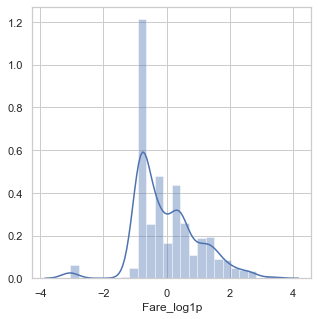

In [63]:
sns.distplot(scaled_df['Fare_log1p'])

<AxesSubplot:xlabel='Age'>

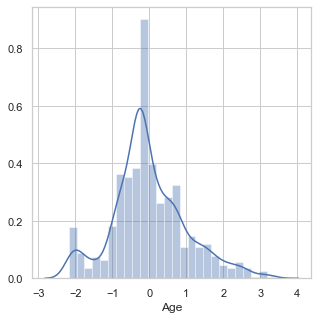

In [64]:
sns.distplot(scaled_df['Age'])

<AxesSubplot:xlabel='Survived'>

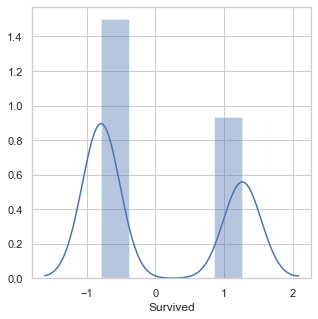

In [65]:
sns.distplot(scaled_df['Survived'])

<AxesSubplot:xlabel='Pclass'>

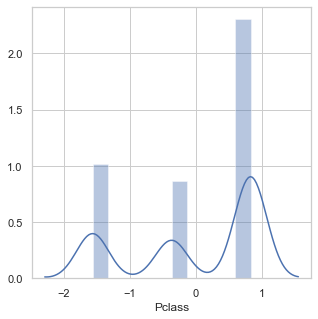

In [66]:
sns.distplot(scaled_df['Pclass'])

<AxesSubplot:xlabel='SibSp'>

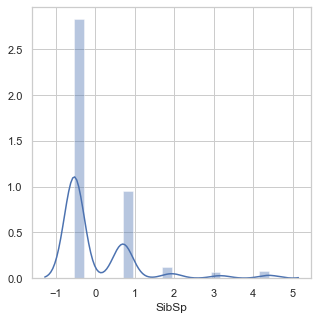

In [67]:
sns.distplot(scaled_df['SibSp'])

<AxesSubplot:xlabel='Parch'>

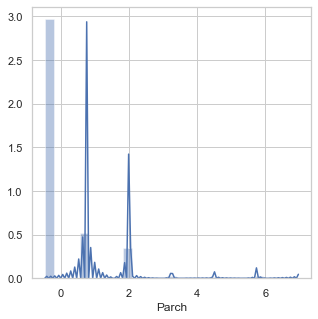

In [68]:
sns.distplot(scaled_df['Parch'])

<AxesSubplot:xlabel='Embarked'>

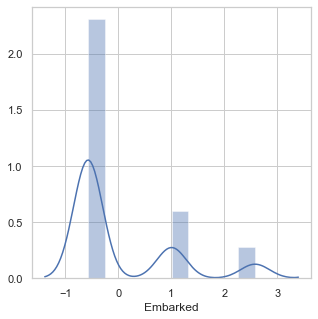

In [69]:
sns.distplot(scaled_df['Embarked'])

<AxesSubplot:xlabel='Sex'>

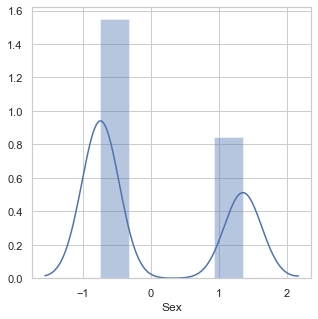

In [70]:
sns.distplot(scaled_df['Sex'])

<AxesSubplot:xlabel='Survived'>

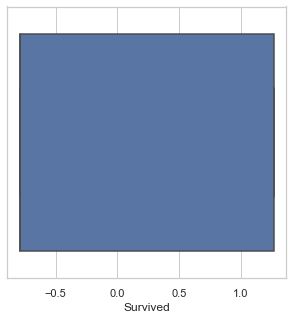

In [71]:
sns.boxplot(scaled_df['Survived'])

<AxesSubplot:xlabel='Pclass'>

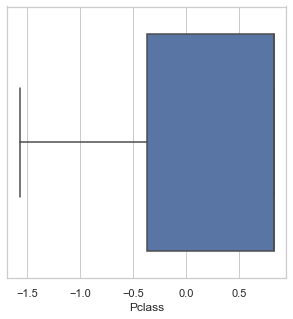

In [72]:
sns.boxplot(scaled_df['Pclass'])

<AxesSubplot:xlabel='Parch'>

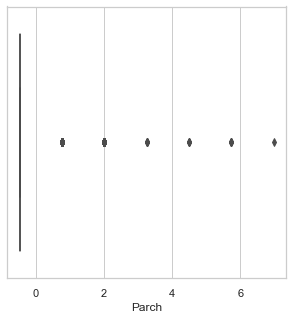

In [73]:
sns.boxplot(scaled_df['Parch'])

<AxesSubplot:xlabel='SibSp'>

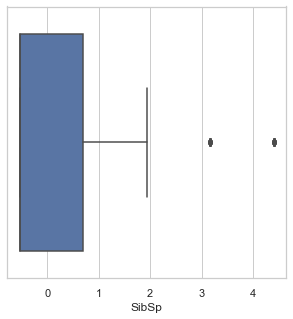

In [74]:
sns.boxplot(scaled_df['SibSp'])

<AxesSubplot:xlabel='Embarked'>

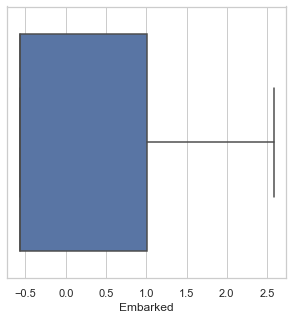

In [75]:
sns.boxplot(scaled_df['Embarked'])

<AxesSubplot:xlabel='Sex'>

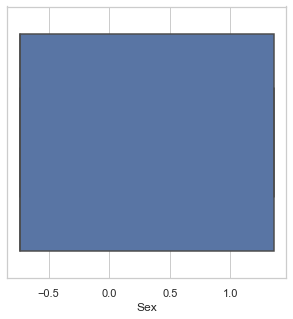

In [76]:
sns.boxplot(scaled_df['Sex'])

## PART 4: Hypothesis Testing

### HYPOTHESIS 1 : The proportion of females onboard who survived the sinking of the Titanic was higher than the proportion of males onboard who survived the sinking of the Titanic.
### NULL HYPOTHESIS: There is no relationship between the sex and the survived or The proportion of female survivors is equal to the proportion of male survivors
### ALTERNATE HYPOTHESIS: There is a relationship between the sex and the survived or The proportion of female survivors is not equal to the proportion of male survivors

### (Using chi-squared test to check if the two variables are related)   (Alpha = 0.05)

In [77]:
scaled_df['Sex'].value_counts()

-0.737695    577
 1.355574    314
Name: Sex, dtype: int64

In [78]:
#Pearson's chi-squared test
sex_survived = pd.crosstab(index=scaled_df['Sex'], columns=scaled_df['Survived'])
sex_survived 

Survived,-0.7892723355548015,1.266989801811655
Sex,,
-0.737695,468,109
1.355574,81,233


In [79]:
pd.crosstab(index=scaled_df['Sex'], columns=scaled_df['Survived'], margins=True)

Survived,-0.7892723355548015,1.266989801811655,All
Sex,,,
-0.7376951317802901,468,109,577
1.3555735383351193,81,233,314
All,549,342,891


In [80]:
(chi2, p, dof, _) = stats.chi2_contingency([sex_survived.iloc[0].values, sex_survived.iloc[1].values])

In [81]:
print("Chi2:  ", chi2)  #Higher the chi2 more the values are related
print("p-value:   ", p)  #p-value < 0.5 will show that its statistically signinficant so we can reject the null hypothesis
print("Degree of freedom:   ", dof)

Chi2:   260.71702016732104
p-value:    1.1973570627755645e-58
Degree of freedom:    1


In [82]:
if(p<0.05):
    print("The null hypothesis is rejected!!! The sex and survived class are related!")
else:
    print("The null hypothesis is not rejected!!! The sex and survived class are not related!")

The null hypothesis is rejected!!! The sex and survived class are related!


### Conclusion: The females onboard had a better chance of survival than the males

### HYPOTHESIS 2 : Socio-Economic status of people played a role in their survival on the titanic
### NULL HYPOTHESIS: The socio-economic status of the people didn’t have an effect on the survival rate. 
### ALTERNATE HYPOTHESIS: The socio-economic status of the people had an effect on the survival rate.

### (Using Z-test) (Alpha = 0.05)

In [113]:
# creating samples using Central Limit Theorem
Pclass1_Sample = np.array([np.mean(scaled_df[scaled_df["Pclass"]==-1.566107].sample(20)["Survived"].values) for i in range(100)])
Pclass3_Sample = np.array([np.mean(scaled_df[scaled_df["Pclass"]==0.827377].sample(20)["Survived"].values) for i in range(100)])

ValueError: 'a' must be greater than 0 unless no samples are taken

NameError: name 'Pclass1_Sample' is not defined

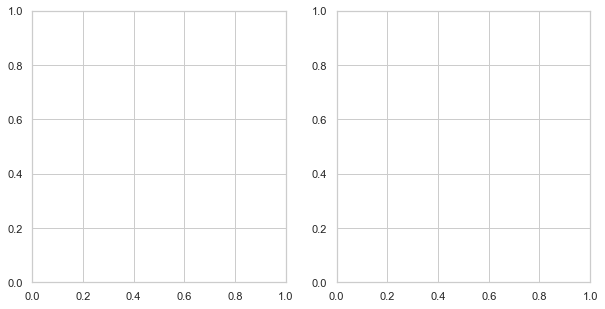

In [84]:
# make plots to check if the distributions are normal.
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(Pclass1_Sample)
plt.title(f"First-Class Sample Distribution \n Mean: {np.mean(Pclass1_Sample)}")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.distplot(Pclass3_Sample)
plt.title(f"Third-Class Sample Distribution \n Mean: {np.mean(Pclass3_Sample)}")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Claculating the z score and p value
effect = np.mean(Pclass1_Sample) - np.mean(Pclass3_Sample)
sigma_first = np.std(Pclass1_Sample)
sigma_third = np.std(Pclass3_Sample)
sigma_difference = np.sqrt((sigma_first**2)/len(Pclass1_Sample)  +  (sigma_third**2)/len(Pclass3_Sample))
z_score = effect / sigma_difference

In [ ]:
# Calculating the p value for two-tailed test
p_value =  stats.norm.sf(abs(z_score))*2
p_value

In [ ]:
if(p_value<0.05):
    print("The null hypothesis is rejected!!!")
else:
    print("The null hypothesis is not rejected!!!")

### Conclusion: The socio-economic status of people affected their survival rates i.e richer people had a better chance of survival on the Titanic

### HYPOTHESIS 3 : The passengers who survived the titanic were younger than those who didn't.
### NULL HYPOTHESIS: The survivors were not younger than the passengers who died. 
### ALTERNATE HYPOTHESIS: The survivors were younger than the passengers who died.

### (Using T-test) (Alpha = 0.05)

In [ ]:
#The average of age of people who survived and people who didn't survive
Survived_age = scaled_df.loc[scaled_df['Survived'] == 1, 'Age'].mean()
Not_Survived_age = scaled_df.loc[scaled_df['Survived'] == 0, 'Age'].mean()
print(Survived_age)
print(Not_Survived_age)

In [ ]:
var_a = scaled_df.loc[scaled_df['Survived'] == 1, 'Age'].var(ddof=1)
var_b = scaled_df.loc[scaled_df['Survived'] == 0, 'Age'].var(ddof=1)
print(var_a)
print(var_b)

In [ ]:
N1 = scaled_df.loc[scaled_df['Survived'] == 1, 'Survived'].count()
N2 = scaled_df.loc[scaled_df['Survived'] == 0, 'Survived'].count()
print("Survived count:",N1)
print("Not_survied count:",N2)

In [ ]:
Survived_age = scaled_df.loc[scaled_df['Survived'] == 1, 'Age']
Not_Survived_age = scaled_df.loc[scaled_df['Survived'] == 0, 'Age']

In [ ]:
stat, p = stats.ttest_ind(Survived_age, Not_Survived_age, equal_var = False)
if(p>0.05):
    print("Fail to reject null hypothesis!")
else:
    print("Null hypothesis is rejected!")

### Conclusion: Failed to reject null hypothesis that the survivors were not younger than the passengers who died.

## CHECKING WHETHER THE VARIABLES ARE RELATED TO THE SURIVED 

### Relation between SibSp and Survived
### NULL HYPOTHESIS: There is no relationship between the SibSp and the survived 
### ALTERNATE HYPOTHESIS: There is a relationship between the SibSP and the survived 

### (Using chi-squared test to check if the two variables are related)   (Alpha = 0.05)

In [85]:
scaled_df['SibSp'].value_counts()

-0.532519    620
 0.699882    209
 1.932284     28
 4.397088     18
 3.164686     16
Name: SibSp, dtype: int64

In [86]:
#Pearson's chi-squared test
sibsp_survived = pd.crosstab(index=scaled_df['SibSp'], columns=scaled_df['Survived'])
sibsp_survived

Survived,-0.7892723355548015,1.266989801811655
SibSp,,
-0.532519,410,210
0.699882,97,112
1.932284,15,13
3.164686,12,4
4.397088,15,3


In [87]:
pd.crosstab(index=scaled_df['SibSp'], columns=scaled_df['Survived'], margins=True)

Survived,-0.7892723355548015,1.266989801811655,All
SibSp,,,
-0.5325192483499631,410,210,620
0.699882440688523,97,112,209
1.932284129727009,15,13,28
3.164685818765495,12,4,16
4.397087507803981,15,3,18
All,549,342,891


In [88]:
(chi2, p, dof, _) = stats.chi2_contingency([sibsp_survived.iloc[0].values, sibsp_survived.iloc[1].values])

In [89]:
print("Chi2:  ", chi2)  #Higher the chi2 more the values are related
print("p-value:   ", p)  #p-value < 0.5 will show that its statistically signinficant so we can reject the null hypothesis
print("Degree of freedom:   ", dof)

Chi2:   24.75869679657834
p-value:    6.497496461848203e-07
Degree of freedom:    1


In [90]:
if(p<0.05):
    print("The null hypothesis is rejected!!! The SibSp and survived class are related!")
else:
    print("The null hypothesis is not rejected!!! The SibSp and survived class are not related!")

The null hypothesis is rejected!!! The SibSp and survived class are related!


### Relation between Pclass and Survived
### NULL HYPOTHESIS: There is no relationship between the Pclass and the survived 
### ALTERNATE HYPOTHESIS: There is a relationship between the Pclass and the survived 

### (Using chi-squared test to check if the two variables are related)   (Alpha = 0.05)

In [91]:
scaled_df['Pclass'].value_counts()

 0.827377    491
-1.566107    216
-0.369365    184
Name: Pclass, dtype: int64

In [92]:
#Pearson's chi-squared test
pclass_survived = pd.crosstab(index=scaled_df['Pclass'], columns=scaled_df['Survived'])
pclass_survived

Survived,-0.7892723355548015,1.266989801811655
Pclass,,
-1.566107,80,136
-0.369365,97,87
0.827377,372,119


In [93]:
pd.crosstab(index=scaled_df['Pclass'], columns=scaled_df['Survived'], margins=True)

Survived,-0.7892723355548015,1.266989801811655,All
Pclass,,,
-1.5661069258891576,80,136,216
-0.3693648410115938,97,87,184
0.8273772438659699,372,119,491
All,549,342,891


In [94]:
(chi2, p, dof, _) = stats.chi2_contingency([pclass_survived.iloc[0].values, pclass_survived.iloc[1].values])

In [95]:
print("Chi2:  ", chi2)  #Higher the chi2 more the values are related
print("p-value:   ", p)  #p-value < 0.5 will show that its statistically signinficant so we can reject the null hypothesis
print("Degree of freedom:   ", dof)

Chi2:   9.277542520771174
p-value:    0.0023198045403708817
Degree of freedom:    1


In [96]:
if(p<0.05):
    print("The null hypothesis is rejected!!! The Pclass and survived class are related!")
else:
    print("The null hypothesis is not rejected!!! The Pclass and survived class are not related!")

The null hypothesis is rejected!!! The Pclass and survived class are related!


### Relation between Parch and Survived
### NULL HYPOTHESIS: There is no relationship between the Parch and the survived 
### ALTERNATE HYPOTHESIS: There is a relationship between the Parch and the survived 

### (Using chi-squared test to check if the two variables are related)   (Alpha = 0.05)

In [97]:
scaled_df['Parch'].value_counts()

-0.473674    678
 0.767630    118
 2.008933     80
 5.732844      5
 3.250237      5
 4.491540      4
 6.974147      1
Name: Parch, dtype: int64

In [98]:
#Pearson's chi-squared test
parch_survived = pd.crosstab(index=scaled_df['Parch'], columns=scaled_df['Survived'])
parch_survived

Survived,-0.7892723355548015,1.266989801811655
Parch,,
-0.473674,445,233
0.767630,53,65
2.008933,40,40
3.250237,2,3
4.491540,4,0
5.732844,4,1
6.974147,1,0


In [99]:
pd.crosstab(index=scaled_df['Parch'], columns=scaled_df['Survived'], margins=True)

Survived,-0.7892723355548015,1.266989801811655,All
Parch,,,
-0.4736736092984604,445,233,678
0.7676298785983874,53,65,118
2.0089333664952354,40,40,80
3.250236854392083,2,3,5
4.491540342288931,4,0,4
5.73284383018578,4,1,5
6.974147318082627,1,0,1
All,549,342,891


In [100]:
(chi2, p, dof, _) = stats.chi2_contingency([parch_survived.iloc[0].values, parch_survived.iloc[1].values])

In [101]:
print("Chi2:  ", chi2)  #Higher the chi2 more the values are related
print("p-value:   ", p)  #p-value < 0.5 will show that its statistically signinficant so we can reject the null hypothesis
print("Degree of freedom:   ", dof)

Chi2:   17.547102859676023
p-value:    2.802775000147297e-05
Degree of freedom:    1


In [102]:
if(p<0.05):
    print("The null hypothesis is rejected!!! The Parch and survived class are related!")
else:
    print("The null hypothesis is not rejected!!! The Parch and survived class are not related!")

The null hypothesis is rejected!!! The Parch and survived class are related!


### Relation between Embarked and Survived
### NULL HYPOTHESIS: There is no relationship between the Embarked and the survived 
### ALTERNATE HYPOTHESIS: There is a relationship between the Embarked and the survived 

### (Using chi-squared test to check if the two variables are related) (Alpha = 0.05)

In [103]:
scaled_df['Embarked'].value_counts()

-0.568837    646
 1.005181    168
 2.579199     77
Name: Embarked, dtype: int64

In [104]:
#Pearson's chi-squared test
embarked_survived = pd.crosstab(index=scaled_df['Embarked'], columns=scaled_df['Survived'])
embarked_survived

Survived,-0.7892723355548015,1.266989801811655
Embarked,,
-0.568837,427,219
1.005181,75,93
2.579199,47,30


In [105]:
pd.crosstab(index=scaled_df['Embarked'], columns=scaled_df['Survived'], margins=True)

Survived,-0.7892723355548015,1.266989801811655,All
Embarked,,,
-0.5688371232977536,427,219,646
1.0051811278149745,75,93,168
2.5791993789277026,47,30,77
All,549,342,891


In [106]:
(chi2, p, dof, _) = stats.chi2_contingency([embarked_survived.iloc[0].values, embarked_survived.iloc[1].values])

In [107]:
print("Chi2:  ", chi2)  #Higher the chi2 more the values are related
print("p-value:   ", p)  #p-value < 0.5 will show that its statistically signinficant so we can reject the null hypothesis
print("Degree of freedom:   ", dof)

Chi2:   25.06676967878475
p-value:    5.537902809393984e-07
Degree of freedom:    1


In [108]:
if(p<0.05):
    print("The null hypothesis is rejected!!! The Embarked and survived class are related!")
else:
    print("The null hypothesis is not rejected!!! The Embarked and survived class are not related!")

The null hypothesis is rejected!!! The Embarked and survived class are related!


## PART 5 : Correlation

In [109]:
scaled_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare_log1p', 'Embarked']].corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare_log1p,Embarked
Survived,1.000000,-0.338481,0.543351,-0.055690,0.040450,0.081629,0.329862,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.398325,0.020150,0.018443,-0.661022,0.045702
Sex,0.543351,-0.131900,1.000000,-0.088541,0.154382,0.245489,0.263276,0.116569
Age,-0.055690,-0.398325,-0.088541,1.000000,-0.286167,-0.185541,0.129716,-0.025074
SibSp,0.040450,0.020150,0.154382,-0.286167,1.000000,0.338384,0.296770,-0.017713
Parch,0.081629,0.018443,0.245489,-0.185541,0.338384,1.000000,0.332186,-0.078665
Fare_log1p,0.329862,-0.661022,0.263276,0.129716,0.296770,0.332186,1.000000,0.019588
Embarked,0.106811,0.045702,0.116569,-0.025074,-0.017713,-0.078665,0.019588,1.000000


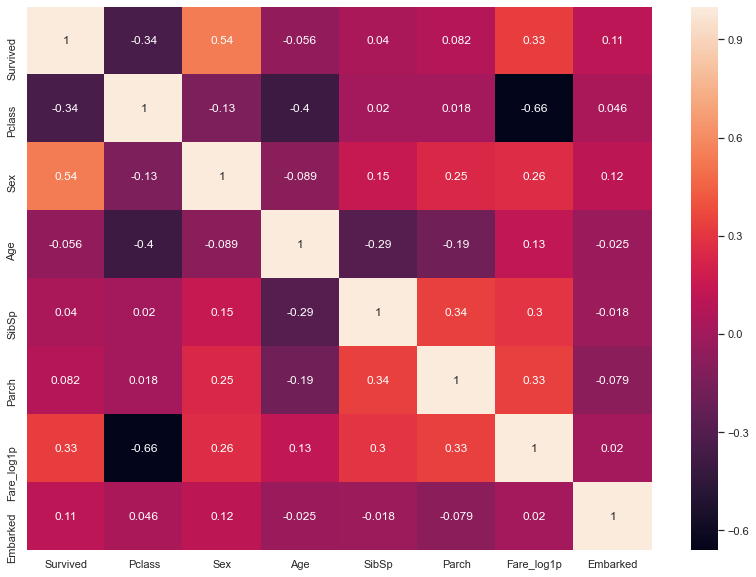

In [110]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
ax=sns.heatmap(scaled_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare_log1p', 'Embarked']].corr(),annot=True)

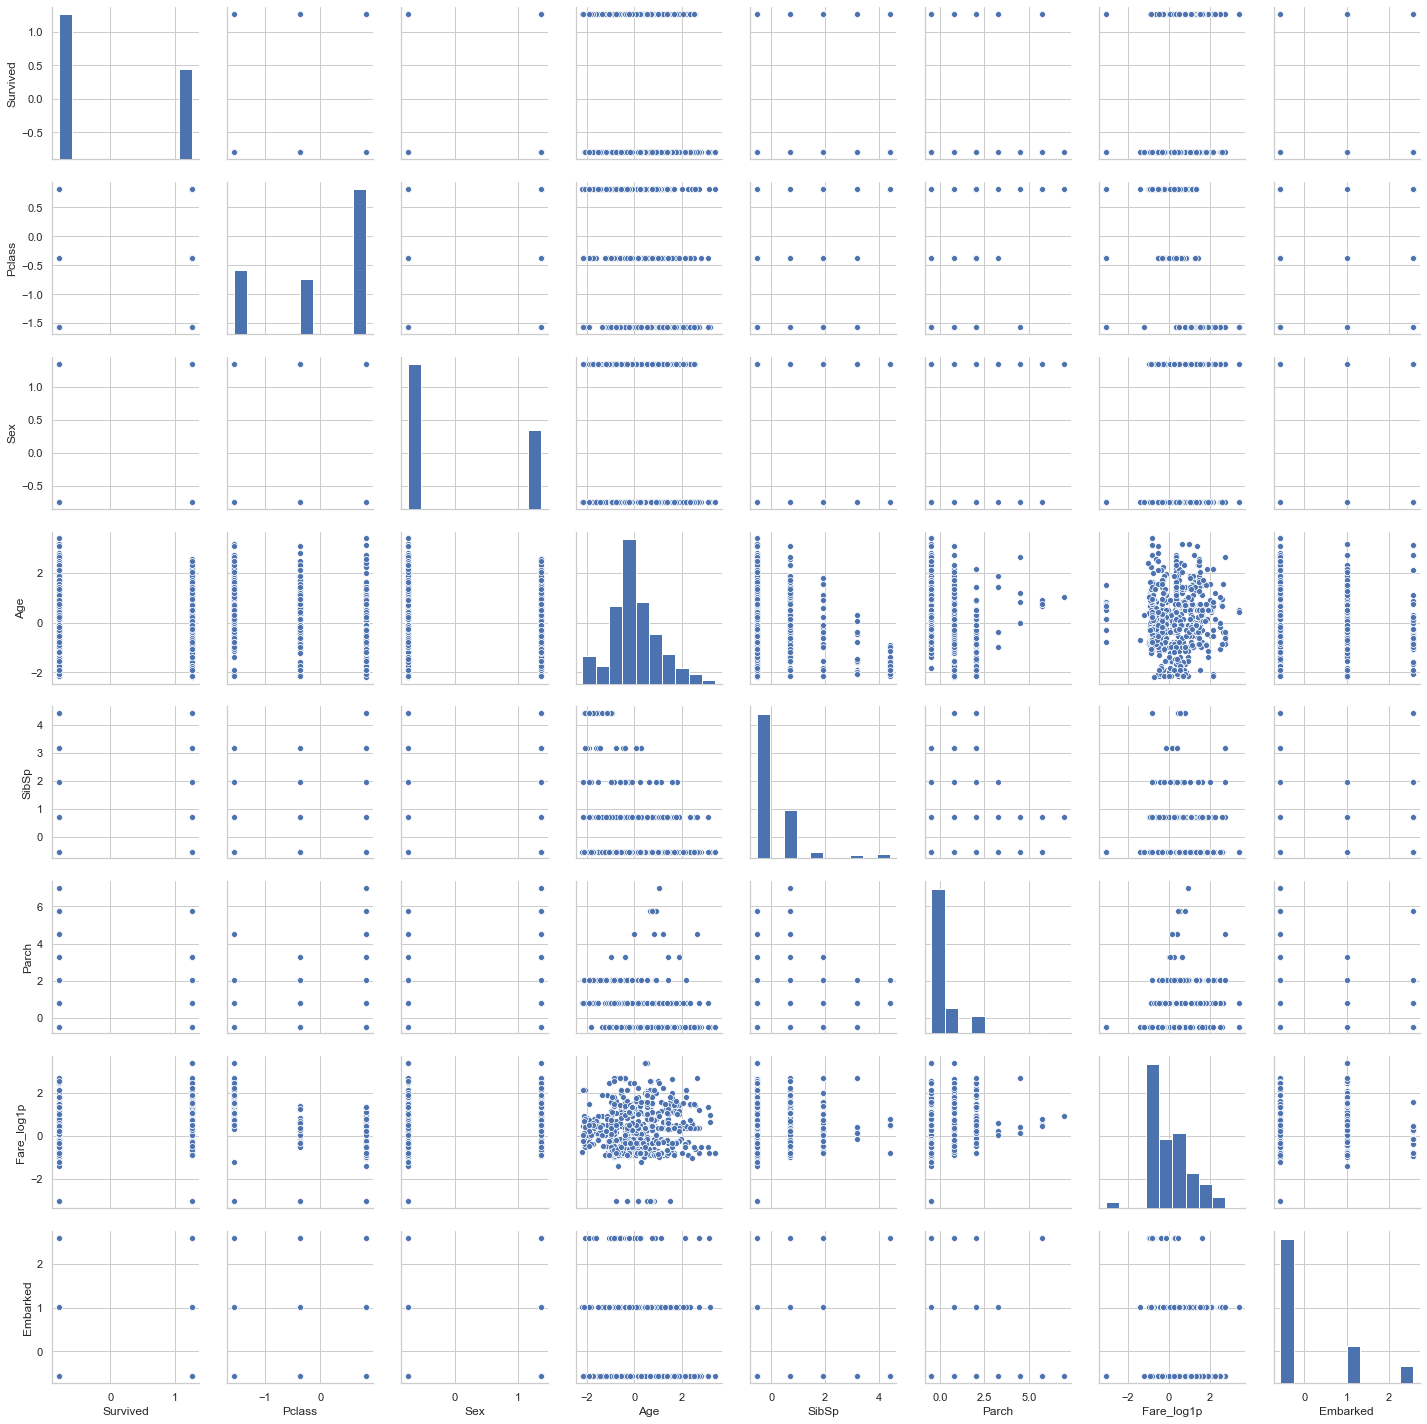

In [112]:
sns.pairplot(scaled_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare_log1p', 'Embarked']])

### Inferences from the correlation plot: 
   ### Survived Class
### 1) From the correlation matrix we can understand that the Survived class is positively correlated to Sex, Fare and negatively correlated to Pclass.
### 2)It is weakly positively correlated to Embarked. 
### 3) The survived class has negligible correlation to Age, SibSp,  Parch.